> mauricio cabreira v1

# Project: Investigate Medical Appointments in Brazil cities

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

**We studied a dataset that contains +100K medical appointments from Brazil counties and this report aims to answer these questions:**

- What are the ages that had more medical appointments?
- What is the split between genders?
- How long does it take to get an appointment?
- From all the appointments, how many presented no-show?

<a id='wrangling'></a>
## 1: Data Wrangling


### This section performs data checks to understand the data better

In [393]:
#Load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [394]:
df = pd.read_csv('patients.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [395]:
df.shape

(110527, 14)

In [396]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [397]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [398]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

There are no duplicated Appointments. But some patients have more than one appointment

In [399]:
df.duplicated().sum()

0

In [400]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [401]:
df[df['Age'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [402]:
#Investigating Alcoholism in people younger than 16, and dropping

df.query('Age <= 15 & Alcoholism == 1').Age.count()



17

### From the checks done above, we could observe the following:

- There are no nulls neither duplicated rows

- ScheduledDay and AppointmentDay contains time, which are not relevant for this analysis. Time will be removed and date will be converted to datetime

- Patient ID is not a string, but it does not impact on the analysis

- Columns SMS_received and No-show does not follow the pattern and will be renamed to SMSReceived and NoShow

- There is a patient with negative age (-1) and will be removed

- Remove people with 15 years or less appointed as Alcoholic

- There are some rows where the scheduling day is AFTER the appointment. Drop them

- Patient ID is a float. Convert to string to make eaiser to read.

- 20% of appointments schedule were the patient did not show up. 



### 2: Data Cleaning 

See above the adjustments needed, which will be done in this section:

In [403]:
#Remove time from date as it is not necessary for this analysis:

df['ScheduledDay'] = df['ScheduledDay'].apply(lambda x: x.split("T")[0])
df['AppointmentDay'] = df['AppointmentDay'].apply(lambda x: x.split("T")[0])


In [404]:
#Change data type to datetime

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])


In [405]:

days_to_appointment = (df.AppointmentDay - df.ScheduledDay).dt.days
days_to_appointment.describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
dtype: float64

In [406]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [407]:
df.dtypes

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object

In [408]:
#Rename SMS_receive and No-show columns to follow other columns pattern
df.rename(columns={'SMS_received':'SMSReceived',
                   'No-show':'NoShow'},
         inplace=True)


In [409]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMSReceived,NoShow
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [410]:
#Remove patients with negative age
df.drop( df[df['Age'] < 0 ].index , inplace=True)

In [411]:
#df[df.Age < 0]
df.query('Age < 0').Age.count()

0

In [412]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMSReceived
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [413]:
#Remove patients with alcoholism that are 15 and younger.

df = df.drop(df[(df.Age <= 15) & (df.Alcoholism == 1)].index)

In [414]:
df.query('Age <= 15 & Alcoholism == 1').Age.count()

0

Working on the dates. it seems that there are few ones where the scheduled day date is AFTER the appointment day

In [415]:
#Create the DaysToAppointment column
df['DaysToAppointment'] = days_to_appointment
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMSReceived,NoShow,DaysToAppointment
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


In [416]:
df.describe().DaysToAppointment

count    110509.000000
mean         10.184881
std          15.255825
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: DaysToAppointment, dtype: float64

In [417]:
df.query('DaysToAppointment < 0').Age.count()

5

In [418]:
#Remove appointments where scheduled date is after the appointment itself 
df.drop( df[df['DaysToAppointment'] < 0 ].index , inplace=True)

In [419]:
df.query('DaysToAppointment < 0').Age.count()

0

In [420]:
#Convert patient ID from float to String
df['PatientId']= df['PatientId'].astype(str)

#remove decimal point due to previous float format
df['PatientId'] = df['PatientId'].apply(lambda x: x.split(".")[0])

In [421]:
df.dtypes

PatientId                    object
AppointmentID                 int64
Gender                       object
ScheduledDay         datetime64[ns]
AppointmentDay       datetime64[ns]
Age                           int64
Neighbourhood                object
Scholarship                   int64
Hipertension                  int64
Diabetes                      int64
Alcoholism                    int64
Handcap                       int64
SMSReceived                   int64
NoShow                       object
DaysToAppointment             int64
dtype: object

In [422]:
df.PatientId[0]

'29872499824296'

In [423]:

df.query('NoShow == "Yes"').Age.count()

22306

In [424]:
df.query('NoShow == "Yes"').Age.count() / df.Age.count()

0.20185694635488308

There are 22K (20%) appointments that were schedule but patients did not show up. 

<a id='eda'></a>
## 3: Exploratory Data Analysis


### Research Question 1: What are the ages that had more medical appointments?

Divide ages into groups to identify which groups needed more medical appointments:

In [425]:
#Decided to use a fixed group distribution: up to 9y, 10 to 19, 20 to 34, 35 to 49, 50 to 64, 65 to 79, and 80+.
bin_edges = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99, 115]
bin_edges

[0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99, 115]

In [426]:
bin_names = ['0_9','10_19','20_29', '30_39', '40_49', '50_59', '60_69', '70_79', '80_89', '90_99', '100_plus']
bin_names

['0_9',
 '10_19',
 '20_29',
 '30_39',
 '40_49',
 '50_59',
 '60_69',
 '70_79',
 '80_89',
 '90_99',
 '100_plus']

In [427]:
#Create the AgeGroup column
df['AgeGroup'] = pd.cut(df['Age'], bin_edges, labels=bin_names)

In [428]:
#But first, let's get only the appointments that really happened. 
df_attended = df.query('NoShow == "No"')


In [429]:
df_attended.DaysToAppointment.describe()

count    88198.000000
mean         8.755233
std         14.551040
min          0.000000
25%          0.000000
50%          2.000000
75%         12.000000
max        179.000000
Name: DaysToAppointment, dtype: float64

In [430]:
df_attended.describe().Age

count    88198.000000
mean        37.793317
std         23.338146
min          0.000000
25%         18.000000
50%         38.000000
75%         56.000000
max        115.000000
Name: Age, dtype: float64

In [431]:
#Query total of appointments by Age groups
values = df_attended.groupby('AgeGroup').count().Age
values

AgeGroup
0_9         11087
10_19        9674
20_29       10319
30_39       11871
40_49       11329
50_59       13087
60_69       10086
70_79        5032
80_89        2481
90_99         324
100_plus        8
Name: Age, dtype: int64

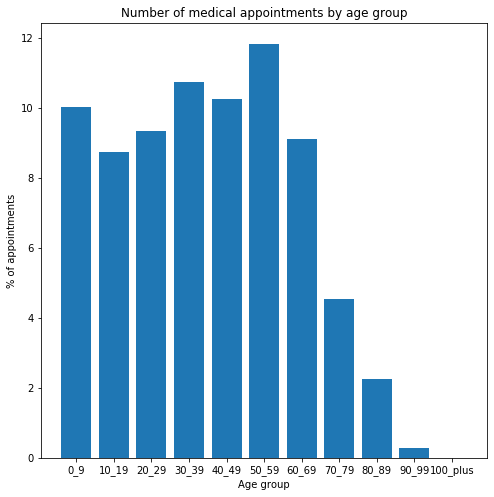

In [432]:
#Plot a histogram to show groups with more appointments.
labels = bin_names
locations = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
heights = values / df.Age.count() * 100

plt.rcParams['figure.figsize'] = [8,8]
plt.title('Number of medical appointments by age group')
plt.xlabel('Age group')
plt.ylabel('% of appointments');
plt.bar(locations, heights, tick_label=labels);


The Histogram above shows the number appointments attended brokedown by age group.

### Research Question 2: What is the gender split?

In [433]:
gender_split = df.groupby('Gender').Age.count() 
gender_split

Gender
F    71834
M    38670
Name: Age, dtype: int64

In [434]:
gender_split_percentage = gender_split / df.Age.count() * 100
gender_split_percentage

Gender
F    65.005792
M    34.994208
Name: Age, dtype: float64

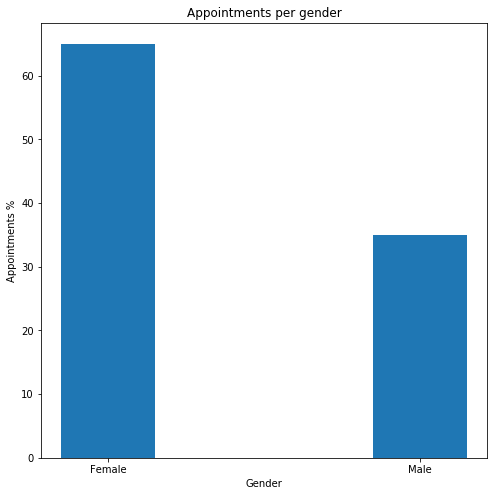

In [435]:

plt.title('Appointments per gender')
plt.xlabel('Gender')
plt.ylabel('Appointments %')
plt.rcParams['figure.figsize'] = [8,8]


plt.bar( [ 'Female', 'Male'],  gender_split_percentage, 
        tick_label=['Female', 'Male'], width = 0.3);



65% of the appointments corresponds to females. 

### Research Question 3: How long does it take to get an appoinment?

Show rows for appointments where patients attended.

In [436]:
#Histogram - shows only appointments that where scheduled in the first 50 days.
number_of_days_in_histogram = 50

days_heights = np.array([])
days_locations = np.array([])


#for i in range(len(days_locations)-1):
for i in range(number_of_days_in_histogram):

    SQL = "DaysToAppointment == {i}".format(i=i)
    days_heights = np.append(days_heights, df_attended.query(SQL).Age.count())
    days_locations = np.append(days_locations, str(i))


In [437]:
days_heights

array([36766.,  4100.,  5122.,  2093.,  4058.,  2405.,  3036.,  3597.,
        1662.,  1163.,   951.,   675.,   762.,  1145.,  2000.,  1001.,
         800.,   757.,   709.,   681.,   779.,  1286.,   769.,   546.,
         387.,   381.,   468.,   693.,  1203.,   733.,   517.,   452.,
         380.,   442.,   538.,   604.,   380.,   212.,   131.,   115.,
         151.,   221.,   263.,   178.,   110.,    87.,    77.,    76.,
          83.,   141.])

In [438]:
days_locations

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49'], dtype='<U32')

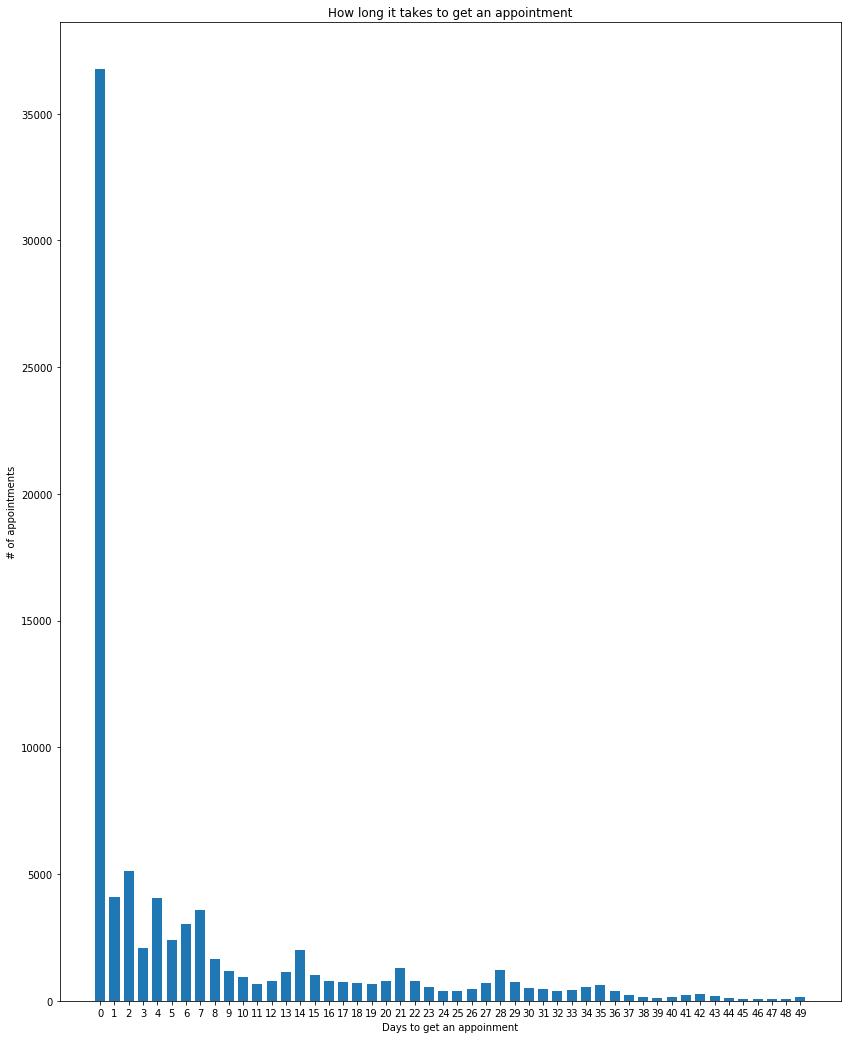

In [439]:
plt.rcParams['figure.figsize'] = [14, 18]
plt.title('How long it takes to get an appointment')
plt.xlabel('Days to get an appoinment')
plt.ylabel('# of appointments')

plt.bar(days_locations, days_heights, tick_label=days_locations, width = 0.7);







The graph above shows a peak every 7 days, that is: when making an appoinment, the majority is done to the next 7, 14, 21, 28, 35, 42, ... days. That could be a rule into the platform that automatic schedules the appointment on multiple of 7 days depending on some rules (availability, urgency, etc..presented data can't say that).

Scheduling and appointments at the same day suggests that patient goes directly to the hospital due to an emergency (i.e.: no appointment has been made)

The data above raises anothe question: would these peaks be related to the same patient returning for a follow-up? let's check below: 

In [440]:
df_attended.PatientId.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
110522    False
110523     True
110524    False
110525     True
110526     True
Name: PatientId, Length: 88198, dtype: bool

Remove additional appointments to the same patients to see if "multiple of 7 days scheduling" pattern remains the same

In [441]:
df_first_appointment_only = df_attended.drop_duplicates(subset='PatientId', keep='first')


In [442]:
df_first_appointment_only.Age.count()

54146

Let's plot the same graph, now excluding the repeated appointments (keep the first one) from the same patients

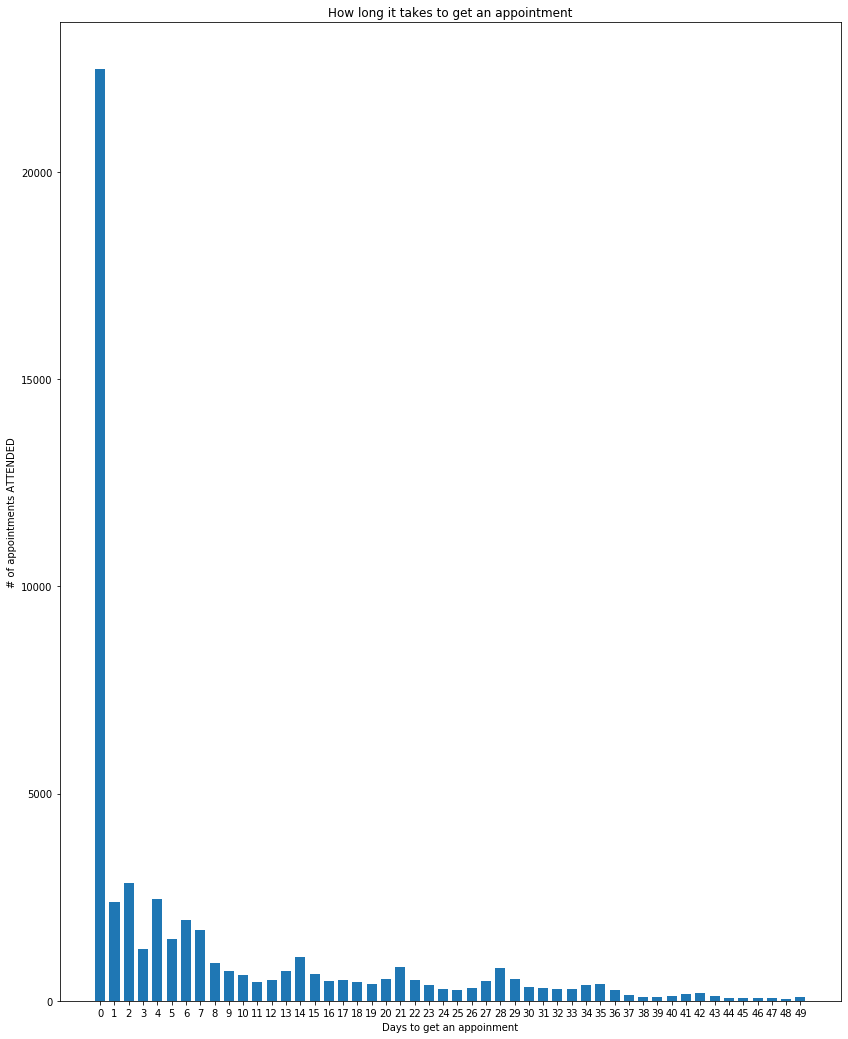

In [443]:

days_heights = np.array([])
days_locations = np.array([])
number_of_days_in_histogram = 50

#for i in range(len(days_locations)-1):
for i in range(number_of_days_in_histogram):

    SQL = "DaysToAppointment == {i}".format(i=i)
    #print(SQL)
    #print(i)
    days_heights = np.append(days_heights, df_first_appointment_only.query(SQL).Age.count())
    days_locations = np.append(days_locations, str(i))
    
plt.rcParams['figure.figsize'] = [14, 18]    
plt.title('How long it takes to get an appointment')
plt.xlabel('Days to get an appoinment')
plt.ylabel('# of appointments ATTENDED')

plt.bar(days_locations, days_heights, tick_label=days_locations, width = 0.7);




Graph above confirms that the peak every 7 days is not related to the patient returning to the doctor for a follow-up.


### Research Question 4: How many patients schedule an appointment but do not show up?

In [444]:
1 - (df_attended.Age.count() / df.Age.count() )

0.20185694635488305

About 20% of the appoinments are not realized

<a id='conclusions'></a>
## Conclusions

# From the analysis above, we could observe that:

### 1- There is no large difference on the number of appointments from different ages until 60 years.

That info can help government to balance the number of doctors specific to each age group (pediatricians, geriatricians, ..) 

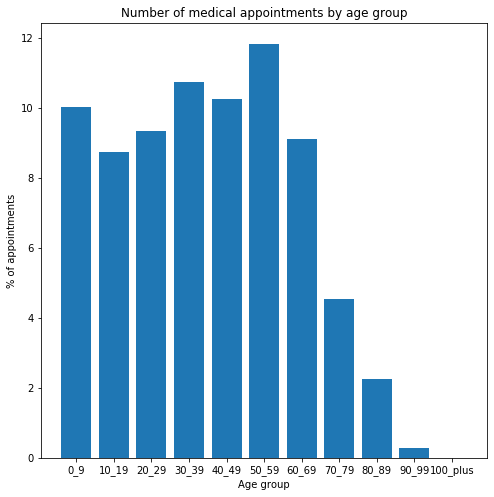

In [445]:
#Plot a histogram to show groups with more appointments.
labels = bin_names
locations = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
heights = values / df.Age.count() * 100

plt.rcParams['figure.figsize'] = [8,8]
plt.title('Number of medical appointments by age group')
plt.xlabel('Age group')
plt.ylabel('% of appointments');
bars = plt.bar(locations, heights, tick_label=labels);


### 2 - 65% of the appointments are made by females.

That can also help the system to balance the number of gynecologists based on that value

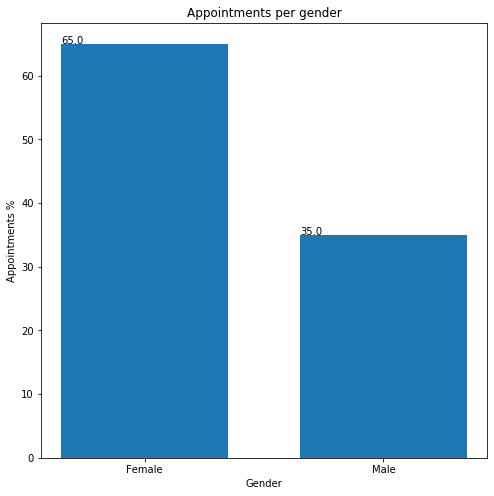

In [446]:

plt.title('Appointments per gender')
plt.xlabel('Gender')
plt.ylabel('Appointments %')

plt.rcParams['figure.figsize'] = [8,8]

bars = plt.bar( [ 'Female', 'Male'],  gender_split_percentage, 
        tick_label=['Female', 'Male'], width = 0.7);


# access the bar attributes to place the text in the appropriate location
for bar in bars:
    yval = np.around(bar.get_height())
    plt.text(bar.get_x(), yval + .005, yval)

### 3 - The majority of the appointments are done on the same day. 

It may indicate that those are emergencies where people show up without a scheduled appointment

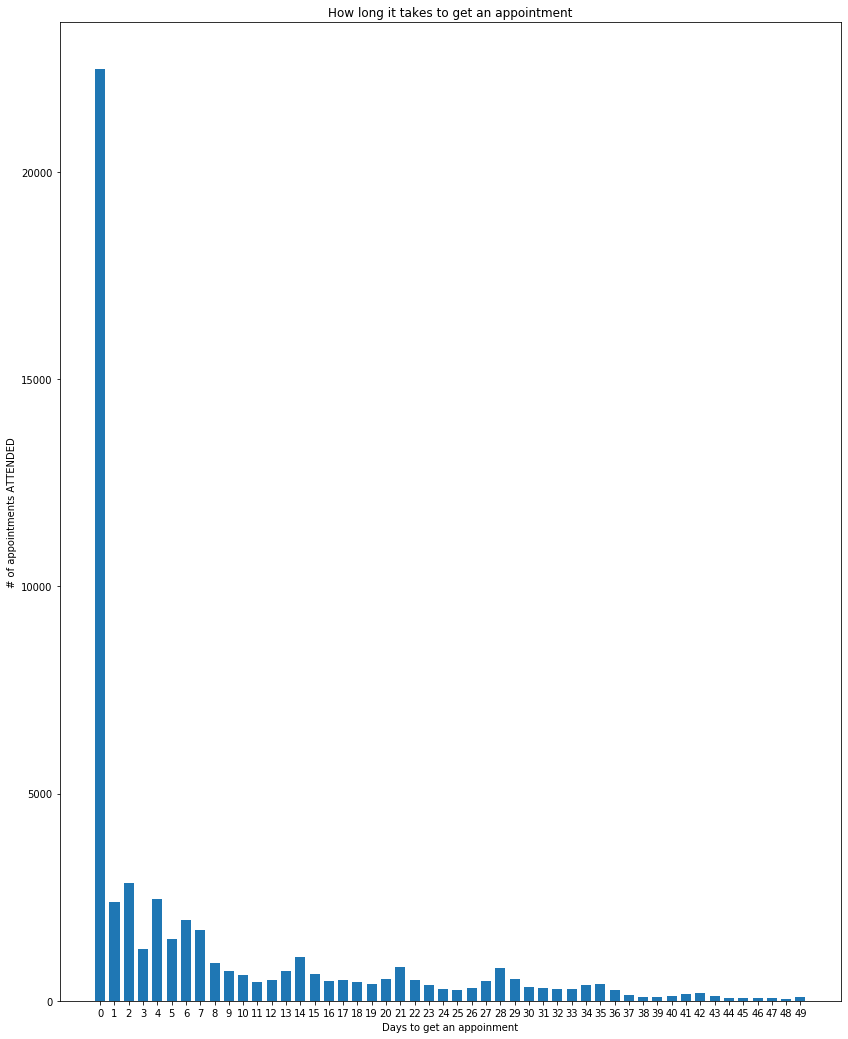

In [448]:

days_heights = np.array([])
days_locations = np.array([])
number_of_days_in_histogram = 50

#for i in range(len(days_locations)-1):
for i in range(number_of_days_in_histogram):

    SQL = "DaysToAppointment == {i}".format(i=i)
    #print(SQL)
    #print(i)
    days_heights = np.append(days_heights, df_first_appointment_only.query(SQL).Age.count())
    days_locations = np.append(days_locations, str(i))
    
plt.rcParams['figure.figsize'] = [14, 18]

    
plt.title('How long it takes to get an appointment')
plt.xlabel('Days to get an appoinment')
plt.ylabel('# of appointments ATTENDED')
plt.bar(days_locations, days_heights, tick_label=days_locations, width = 0.7);




### 4 - Appointments of the next 7, 14, 21, etc. ( multiples of 7 days) happen more often.

As showed in the graph above (item 3), when you schedule an appointment, there is a larger chance that you will get it only 7 days (or 14, or 21, etc..) from the day you call.

### 5 - Only 80% of scheduled appointments really happened.

This shows that there may me an idle capacity that can be balanced, or improvements in the system can be done (i.e.: call day before to confirm) to avoid having this idle capacity and save costs. 
